### Árvores de Decisão

In [67]:
from sklearn.tree import DecisionTreeClassifier  # Biblioteca do classificiador de Àrvore de Decisões
import matplotlib.pyplot as plt

### Base de Risco de Crédito

In [49]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, Y_risco_credito = pickle.load(f)

In [50]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [51]:
Y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [52]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')  # Criando a árvore de decisão com o critério sendo a entropia, como estudado
arvore_risco_credito.fit(X_risco_credito, Y_risco_credito)  # Função (.fit) serve para encaixar os dados da tabela, fazendo o treinamento da árvore

DecisionTreeClassifier(criterion='entropy')

In [53]:
arvore_risco_credito.feature_importances_  # Ganho de informação de cada atributo, na ordem: (Histórico de crédito, tamanho da dívida, garantia, renda)

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [54]:
list(arvore_risco_credito.classes_) # Mostrar classes da árvore

['alto', 'baixo', 'moderado']

[Text(0.5555555555555556, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'história <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.2222222222222222, 0.5833333333333334, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4444444444444444, 0.25, 'dívida <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsample

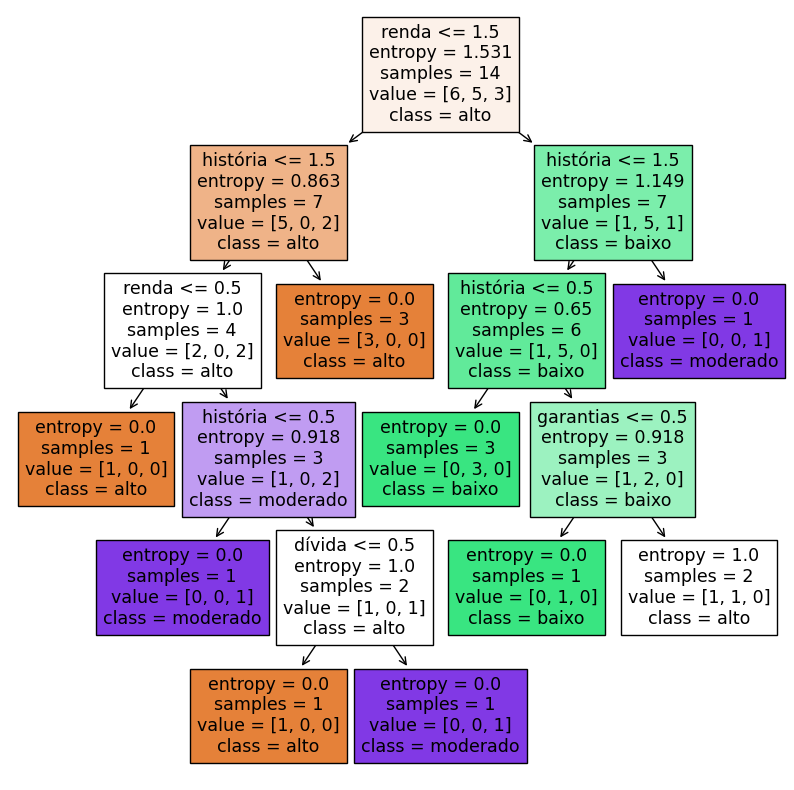

In [82]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']  # Dar nomes aos atributos para o plot_tree
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=list(arvore_risco_credito.classes_), filled=True)  # Gerar interface da árvore de decisão

# samples = quantidade de registros do determinado atributos

In [71]:
# Clientes a avaliar

# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])  # Simulando o processo

previsoes  # risco: (baixo, alto)

array(['baixo', 'alto'], dtype=object)

### Base credit data

In [84]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_creit_teste, Y_credit_teste = pickle.load(f)

In [85]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))